In [1]:
from lvmtipo.actors import lvm

await lvm.sci.agc.start()
# we do also connect to the telscope for a status - position
await lvm.sci.pwi.start()
await lvm.sci.pwi.status()

await lvm.sci.foc.start()
await lvm.sci.foc.moveAbsolute(42)

{'Reachable': True,
 'AtHome': False,
 'Moving': False,
 'PositionSwitchStatus': 254,
 'Position': 42.0,
 'DeviceEncoder': {'Position': -166700.0, 'Unit': 'STEPS'},
 'Velocity': 0.0,
 'AtLimit': False}

east: /data/lvm/sci/agcam/east/20220820/lvm.sci.agcam.east_00000002.fits, west: /data/lvm/sci/agcam/west/20220820/lvm.sci.agcam.west_00000002.fits


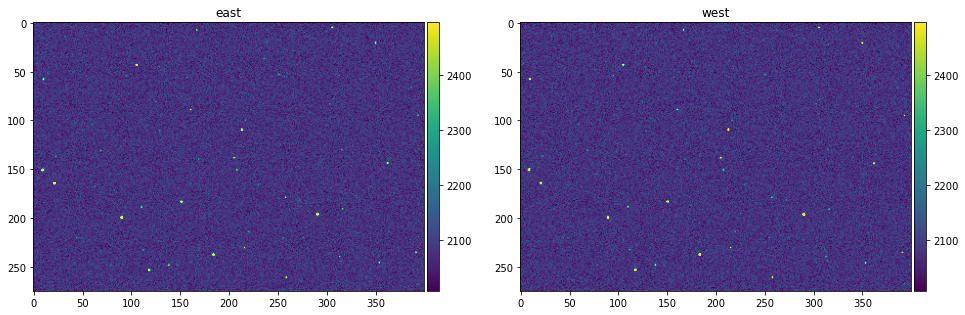

east: /data/lvm/sci/agcam/east/20220820/lvm.sci.agcam.east_00000003.fits, west: /data/lvm/sci/agcam/west/20220820/lvm.sci.agcam.west_00000003.fits


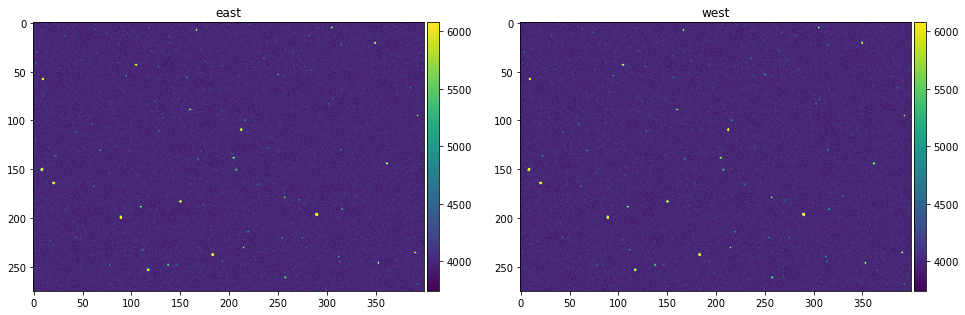

In [2]:
%matplotlib inline
from plotimg import plot_images, fits

for e in [1.,5.]:
    ef, wf = (await lvm.sci.agc.expose(e)).flatten().unpack("east.filename", "west.filename") 
    print(f"east: {ef}, west: {wf}")
    plot_images(fits.getdata(ef, ext=0), fits.getdata(wf, ext=0))

In [4]:
%matplotlib inline
from plotimg import plot_images, fits

from lvmtipo.actors import lvm
from lvmagp.focus import Focus
from logging import DEBUG, INFO

telsubsys = await lvm.from_string("sci").start()
focus = Focus(telsubsys, level = DEBUG)

await lvm.sci.pwi.status()

def img_cb(img_e, img_w):
   plot_images(img_e.data, img_w.data)

f_cal, f_err = await focus.fine(guess=44, count=2, step=4, exposure_time=10, callback=img_cb)

print(f"focus: {f_cal}, err: {f_err}")


AttributeError: 'coroutine' object has no attribute 'start'

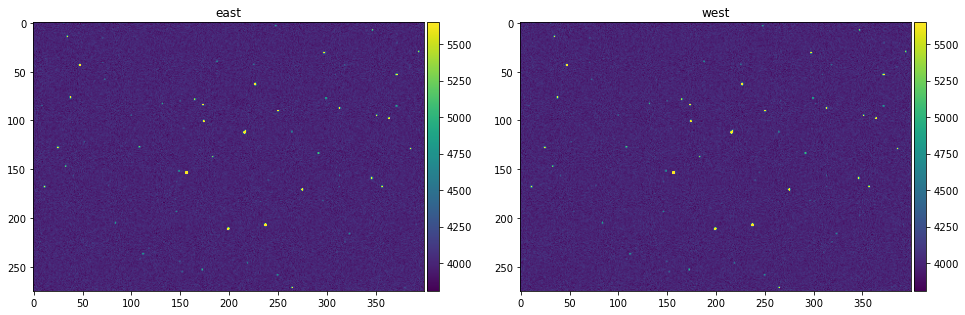

In [2]:
from plotimg import plot_images, fits

await lvm.sci.foc.moveAbsolute(f_cal)
ef, wf = (await lvm.sci.agc.expose(5)).flatten().unpack("east.filename", "west.filename") 
plot_images(fits.getdata(ef, ext=0), fits.getdata(wf, ext=0))

In [ ]:
%matplotlib inline
from lvmtipo.actors import lvm
from plotimg import plot_image, fits

await lvm.spec.agc.start()

ef = (await lvm.spec.agc.expose(1.0)).flatten().unpack("east.filename")[0] 
print(f"east: {ef}")
plot_image(fits.getdata(ef, ext=0))

In [3]:

from lvmagp.images import Image
from lvmagp.images.processors.detection import DaophotSourceDetection, SepSourceDetection
from lvmagp.images.processors.astrometry import AstrometryDotNet

source_detection = SepSourceDetection()

rc = await lvm.sci.agc.expose(5)
print(rc)
ef, wf = rc.flatten().unpack("*.filename")
print(f"east: {ef}, west: {wf}")
ei = await source_detection(Image.from_file(ef))
wi = await source_detection(Image.from_file(wf))

ei.catalog




{'east': {'state': 'written', 'filename': '/data/lvm/sci/agcam/east/20220819/lvm.sci.agcam.east_00000619.fits'}, 'west': {'state': 'written', 'filename': '/data/lvm/sci/agcam/west/20220819/lvm.sci.agcam.west_00000619.fits'}}
east: /data/lvm/sci/agcam/east/20220819/lvm.sci.agcam.east_00000619.fits, west: /data/lvm/sci/agcam/west/20220819/lvm.sci.agcam.west_00000619.fits


x,y,peak,flux,fwhm,a,b,theta,ellipticity,tnpix,kronrad,fluxrad25,fluxrad50,fluxrad75,xwin,ywin
float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64
347.97335518713766,8.302813833174419,1424.51220703125,2990.4001464843755,1.7475692997024663,0.7749235033988953,0.7078069448471069,90.0,0.08661055995515443,5,0.8573383186864096,0.4340242386362852,0.6483353711522587,0.9009935983529246,346.9798908274647,7.234332453775898
35.84127219476924,14.960074847968507,2397.875732421875,3528.247695312501,1.757762816021363,0.7760658264160156,0.7156161069869995,90.0,0.07789251552047027,6,0.6494475128670512,0.3200370516013597,0.4851422058688891,0.7016754356162337,34.97335056586109,13.993579570402545
298.45561825348796,31.959346516379725,2447.2529296875,5646.575009765626,1.8775444300473154,0.8662217855453491,0.7218706607818604,90.0,0.16664453281166247,6,0.7201818519108967,0.436197300764385,0.6776270601814893,0.8938800592325337,297.3779683161796,30.97540156724341
188.7968829485946,40.84538320982004,776.3662109375,186.32789062500004,1.6424570624265153,0.748357892036438,0.6426021456718445,90.0,0.14131707233929214,4,0.15014921489333846,0.15201019681990147,0.1870894730091095,0.22216874919831756,187.96804006233955,39.971156944135224
226.13050621265893,43.53310582853284,462.7470703125,1488.3506738281253,1.4906515366562048,0.7434226274490356,0.49875348806381226,90.0,0.32911177350731946,4,2.050764063019633,0.5547299767604172,0.8833096019958343,1.3594088206279535,225.25764354955808,42.69140469320184
48.373619734991,44.37148450506139,15779.419921875,41445.650595703126,2.021627602701351,0.8590030074119568,0.8580090999603271,90.0,0.0011570476972183608,7,0.7904457813171438,0.5655797654624044,0.765997462639751,0.9592752657545333,47.256490449244396,43.248917649157015
372.50040794848803,53.99452993451891,4157.01123046875,10259.165732421874,1.9909259087792281,0.8629273176193237,0.8276412487030029,90.0,0.040891125122413885,7,0.9617852598913665,0.4843100402534967,0.6721340102841604,0.9512866255981505,371.428820794344,52.99569543979462
227.84855242456624,63.957283867525405,17249.005859375,21026.221601562505,1.922077634699446,0.8172631859779358,0.8151979446411133,90.0,0.0025270211264334375,8,0.4481933050550914,0.29916880428933,0.44520662619990903,0.5882690583670972,226.98398809315646,62.993281792564524
38.95489713905344,77.46097683276408,4453.98681640625,9476.921660156253,1.9600652308067907,0.873018741607666,0.7896168828010559,90.0,0.09553272436399862,8,0.6219007202069254,0.4260189803813009,0.6413142101469052,0.8663951429372662,37.98594312061141,76.28652492946796
